In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:03<00:00, 49.6MB/s]
100% 163M/163M [00:03<00:00, 52.6MB/s]


In [3]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2313.jpg', 'with_mask_1977.jpg', 'with_mask_3568.jpg', 'with_mask_1316.jpg', 'with_mask_1191.jpg']
['with_mask_394.jpg', 'with_mask_376.jpg', 'with_mask_1296.jpg', 'with_mask_2031.jpg', 'with_mask_2922.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3339.jpg', 'without_mask_3075.jpg', 'without_mask_2261.jpg', 'without_mask_3447.jpg', 'without_mask_240.jpg']
['without_mask_2763.jpg', 'without_mask_2447.jpg', 'without_mask_1853.jpg', 'without_mask_3082.jpg', 'without_mask_3096.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

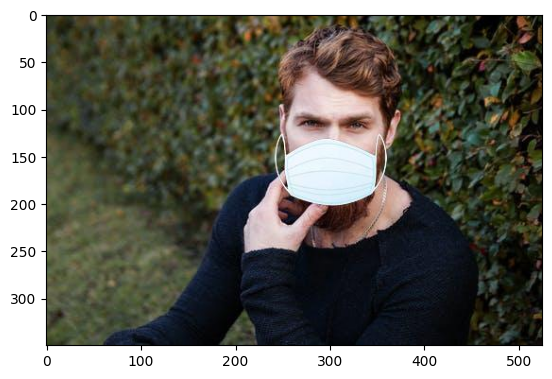

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

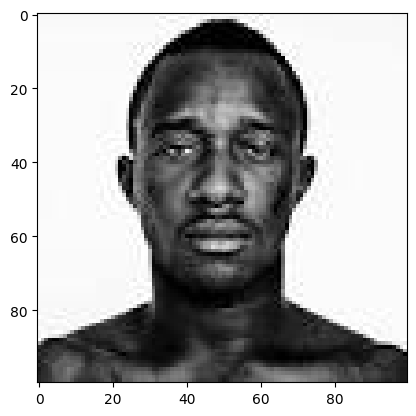

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[235, 234, 240],
        [235, 234, 240],
        [236, 235, 241],
        ...,
        [225, 225, 233],
        [228, 228, 236],
        [227, 227, 236]],

       [[235, 234, 240],
        [235, 234, 240],
        [236, 235, 241],
        ...,
        [228, 228, 236],
        [227, 227, 235],
        [228, 228, 237]],

       [[236, 235, 241],
        [236, 235, 241],
        [237, 236, 242],
        ...,
        [229, 229, 237],
        [228, 227, 235],
        [229, 230, 238]]], dtype=uint8)
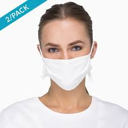

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[115, 109, 110],
        [119, 114, 112],
        [126, 120, 117],
        ...,
        [ 32,  30,  33],
        [ 31,  30,  34],
        [ 31,  29,  34]],

       [[122, 114, 116],
        [126, 119, 117],
        [132, 125, 122],
        ...,
        [ 33,  31,  33],
        [ 32,  31,  34],
        [ 32,  30,  34]],

       [[126, 117, 118],
        [131, 122, 121],
        [138, 129, 127],
        ...,
        [ 34,  32,  33],
        [ 34,  32,  34],
        [ 34,  32,  34]],

       ...,

       [[ 57,  10,  20],
        [ 57,  10,  19],
        [ 55,   9,  17],
        ...,
        [ 92,  91,  97],
        [ 95,  93,  98],
        [ 96,  94,  99]],

       [[ 67,   7,  21],
        [ 67,   9,  21],
        [ 67,  10,  19],
        ...,
        [ 90,  89,  95],
        [ 93,  91,  96],
        [ 94,  92,  97]],

       [[ 73,   9,  23],
        [ 76,  11,  24],
        [ 78,  14,  25],
        ...,
        [ 89,  88,  94],
        [ 92,  90,  95],
        [ 93,  91,  96]]], dtype=uint8)
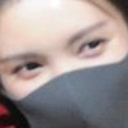

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.45098039, 0.42745098, 0.43137255],
        [0.46666667, 0.44705882, 0.43921569],
        [0.49411765, 0.47058824, 0.45882353],
        ...,
        [0.1254902 , 0.11764706, 0.12941176],
        [0.12156863, 0.11764706, 0.13333333],
        [0.12156863, 0.11372549, 0.13333333]],

       [[0.47843137, 0.44705882, 0.45490196],
        [0.49411765, 0.46666667, 0.45882353],
        [0.51764706, 0.49019608, 0.47843137],
        ...,
        [0.12941176, 0.12156863, 0.12941176],
        [0.1254902 , 0.12156863, 0.13333333],
        [0.1254902 , 0.11764706, 0.13333333]],

       [[0.49411765, 0.45882353, 0.4627451 ],
        [0.51372549, 0.47843137, 0.4745098 ],
        [0.54117647, 0.50588235, 0.49803922],
        ...,
        [0.13333333, 0.1254902 , 0.12941176],
        [0.13333333, 0.1254902 , 0.13333333],
        [0.13333333, 0.1254902 , 0.13333333]],

       ...,

       [[0.22352941, 0.03921569, 0.07843137],
        [0.22352941, 0.03921569, 0.0745098 ],
        [0.21568627, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 170s 987ms/step - acc: 0.7323 - loss: 0.6126 - val_acc: 0.8777 - val_loss: 0.2964
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - acc: 0.8664 - loss: 0.3167 - val_acc: 0.8893 - val_loss: 0.2543
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - acc: 0.8958 - loss: 0.2392 - val_acc: 0.8942 - val_loss: 0.2360
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 165s 972ms/step - acc: 0.9322 - loss: 0.1671 - val_acc: 0.9041 - val_loss: 0.2773
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 199s 954ms/step - acc: 0.9392 - loss: 0.1677 - val_acc: 0.9124 - val_loss: 0.2608


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - acc: 0.9231 - loss: 0.2205
Test Accuracy = 0.9265387058258057


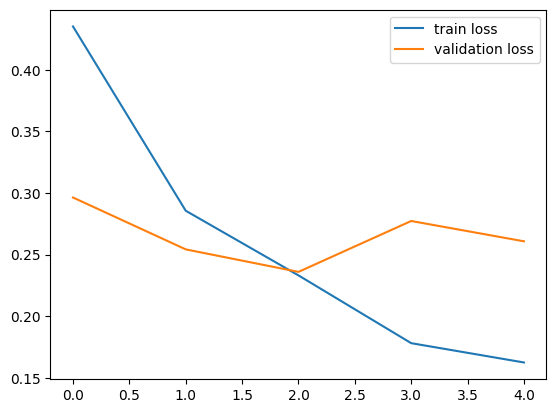

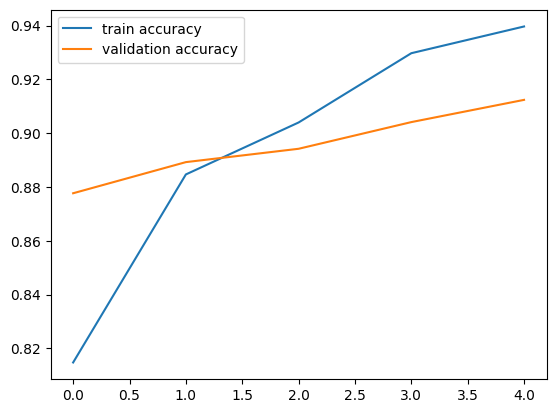

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


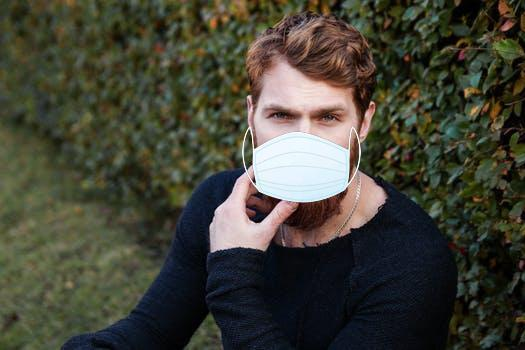

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
[[0.5210252 0.5776584]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1031.jpg


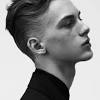

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.6472568  0.53359294]]
0
The person in the image is not wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')